In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


In [2]:
campeonatos = pd.read_csv("campeonatos_futebol_atualizacao.csv")

Começando a análise exploratória dos dados, vou printar a head ( 5 primeiras linhas do dataset ), depois printar o .dtypes ( para analisar o tipo de dado que vamos tratar ) e vou usar o .info para ver quantos dados faltam

In [3]:
print(campeonatos.head())

   Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0             8.0             0.0             6.0             3.0   
1             0.0             2.0             0.0             2.0   
2             4.0             5.0             1.0             5.0   
3             4.0             7.0             8.0             1.0   
4             3.0             1.0             1.0             3.0   

   Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0           7.0           1.0            6.0            1.0       8.0   
1           0.0           4.0            3.0            4.0      19.0   
2           8.0          11.0            2.0            5.0      13.0   
3           6.0           5.0            4.0            7.0       4.0   
4           5.0           4.0            2.0            2.0      12.0   

   Faltas 2  ...  Tiros-livres 1  Tiros-livres 2  Defesas difíceis 1  \
0      14.0  ...             NaN             NaN                 NaN   
1 

In [4]:
print(campeonatos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

Agora, vou ver onde tem valores faltando ( ou seja, NAN ), pra isso vou usar o isnull do pandas

In [5]:
colunas_com_null = campeonatos.columns[campeonatos.isnull().any()]
print(colunas_com_null)

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cruzamentos 1', 'Cruzamentos 2', 'Laterais 1',
       'Laterais 2', 'Chutes bloqueados 1', 'Chutes bloqueados 2',
       'Contra-ataques 1', 'Contra-ataques 2', 'Tiro de meta 1',
       'Tiro de meta 2', 'Tratamentos 1', 'Tratamentos 2', 'Substituições 1',
       'Substituições 2', 'Tiros-livres 1', 'Tiros-livres 2',
       'Defesas difíceis 1', 'Defesas difíceis 2', 'Posse 1(%)', 'Posse 2(%)',
       'Position 1', 'Position 2'],
      dtype='object')


Só para conferir se todas colunas tem valor null:

In [6]:
print(len(colunas_com_null) == len(campeonatos))

False


Agora eu vou tratar as colunas numéricas que tem valor NULL, vou tentar substituir com a mediana, mas fiquem a vontade para mudar. Para isso, vou criar uma df que tenham só as colunas numéricas que tem valor null.

In [7]:
colunas_numericas_null = campeonatos[colunas_com_null].select_dtypes(include='number').columns

Ao inves de fazer um por um, vou fazer um for loop que vá substituindo os valores faltantes de cada coluna pela mediana.

In [8]:
for coluna in colunas_numericas_null:

    campeonatos[coluna] = campeonatos[coluna].fillna(np.mean(campeonatos[coluna]))

Para as colunas que são do tipo 'object', eu vou fazer a mesma coisa, eu vou tentar substituir com a moda, para evitar perdermos linhas do dataframe

In [9]:
colunas_object_null = campeonatos[colunas_com_null].select_dtypes(include = 'object').columns

for coluna in colunas_object_null:

  moda = campeonatos[coluna].mode()[0]
  campeonatos[coluna] = campeonatos[coluna].fillna(moda)

Vou identificar outliers utilizando zscore, ou seja, para modulo de zscore > 3, existe um outlier.

In [15]:
z_scores = stats.zscore(colunas_numericas)

# Define outliers: valores com |Z-Score| > 3
outliers = np.abs(z_scores) > 3

# Mostra os outliers de cada coluna
for i, coluna in enumerate(colunas_numericas.columns):
    if outliers[:, i].any():
        print(f"Outliers na coluna '{coluna}':")
        print()


Outliers na coluna 'Chutes a gol 1':

Outliers na coluna 'Chutes a gol 2':

Outliers na coluna 'Impedimentos 1':

Outliers na coluna 'Impedimentos 2':

Outliers na coluna 'Escanteios 1':

Outliers na coluna 'Escanteios 2':

Outliers na coluna 'Chutes fora 1':

Outliers na coluna 'Chutes fora 2':

Outliers na coluna 'Faltas 1':

Outliers na coluna 'Faltas 2':

Outliers na coluna 'Cartões amarelos 1':

Outliers na coluna 'Cartões amarelos 2':

Outliers na coluna 'Cartões vermelhos 1':

Outliers na coluna 'Cartões vermelhos 2':

Outliers na coluna 'Cruzamentos 1':

Outliers na coluna 'Cruzamentos 2':

Outliers na coluna 'Laterais 1':

Outliers na coluna 'Laterais 2':

Outliers na coluna 'Chutes bloqueados 1':

Outliers na coluna 'Chutes bloqueados 2':

Outliers na coluna 'Contra-ataques 1':

Outliers na coluna 'Contra-ataques 2':

Outliers na coluna 'Gols 1':

Outliers na coluna 'Gols 2':

Outliers na coluna 'Tiro de meta 1':

Outliers na coluna 'Tiro de meta 2':

Outliers na coluna 'Trat

vou criar uma função que limpe todo o dataset

In [ ]:
def dataset_limpo(df):
    colunas_com_null = df.columns[df.isnull().any()]

    colunas_numericas_null = df[colunas_com_null].select_dtypes(include='number').columns
    for coluna in colunas_numericas_null:
        df[coluna] = df[coluna].fillna(np.median(df[coluna]))

    colunas_object_null = df[colunas_com_null].select_dtypes(include='object').columns
    for coluna in colunas_object_null:
        moda = df[coluna].mode()[0]
        df[coluna] = df[coluna].fillna(moda)

    colunas_numericas = df.select_dtypes(include='number')
    z_scores = stats.zscore(colunas_numericas)
    outliers = (np.abs(z_scores) > 3)
    linhas_sem_outliers = ~(outliers.any(axis=1))
    df = df[linhas_sem_outliers]
    return df

Chamar a função dataset_limpo para garantir que esteja limpo

In [ ]:
dataset_limpo(campeonatos)

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.000000,3.000000,7.0,1.0,6.0,1.0,8.0,14.0,...,14.15626,14.245757,2.676888,3.206908,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.000000,2.000000,0.0,4.0,3.0,4.0,19.0,14.0,...,14.15626,14.245757,2.676888,3.206908,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
4,3.0,1.0,1.000000,3.000000,5.0,4.0,2.0,2.0,12.0,17.0,...,14.15626,14.245757,2.676888,3.206908,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1
5,5.0,5.0,1.000000,0.000000,2.0,4.0,3.0,7.0,21.0,11.0,...,14.15626,14.245757,2.676888,3.206908,43.0,57.0,Motherwell,Hibernian,4-2-3-1,4-2-3-1
6,2.0,2.0,0.000000,1.000000,5.0,8.0,1.0,7.0,11.0,8.0,...,14.15626,14.245757,2.676888,3.206908,32.0,68.0,Dundee U.,Glasgow Rangers,4-2-3-1,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27710,5.0,6.0,4.000000,3.000000,3.0,6.0,2.0,3.0,16.0,16.0,...,14.15626,14.245757,2.676888,3.206908,41.0,59.0,Bolton,Birmingham,4-4-2,4-4-2
27711,6.0,2.0,1.000000,0.000000,9.0,6.0,6.0,5.0,7.0,7.0,...,14.15626,14.245757,2.676888,3.206908,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1
27712,6.0,0.0,4.000000,3.000000,4.0,2.0,8.0,2.0,11.0,9.0,...,14.15626,14.245757,2.676888,3.206908,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2
27714,6.0,6.0,1.000000,2.000000,4.0,3.0,4.0,6.0,5.0,3.0,...,14.15626,14.245757,2.676888,3.206908,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2


Irei criar um dataframe chamado "Vitoria1" Que armazenará um valor binário dizendo se o time 1 ganhou ou não. Além disso, utilizarei as features numéricas, com excessão de "Gols1", "Gols2" e "Vitória1", porque é justamente o que queremos prever.

In [ ]:
campeonatos['Vitoria 1'] = (campeonatos['Gols 1'] > campeonatos['Gols 2']).astype(int) #aqui eu criei um novo dataframe com valor binário que diz se o time 1 ganha do time 2.

features = campeonatos.select_dtypes(include=[np.number]).drop(columns=['Gols 1', 'Gols 2', 'Vitoria 1']) #criando as features só com as colunas numéricas, exceto gols 1, gols 2 e vitoria 1, por que fazem parte do nosso output

In [ ]:
X = features
y = campeonatos['Vitoria 1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #dividindo em treino e teste

# normalizar os dados para entrada do model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Usarei o SelectKbest para selecionar as features com maiores relevâncias para nosso modelo de machine learning, de regressão logística.

In [ ]:

# usando kbest para selecionar os melhores features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
# treinar modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train_selected, y_train)


y_pred = modelo.predict(X_test_selected)
y_prob = modelo.predict_proba(X_test_selected)[:, 1]

Aqui vou plotar a curva do rate de falsos positivos pelo rate de verdadeiros postivos, para analisarmos se nosso modelo desempenha melhor que o chute aleatório. O chute é 50%, por isso a reta y = x, para valores entre 0 e 1, se a curva estiver ACIMA dessa reta, então nosso modelo desempenha um bom papel preditivo.

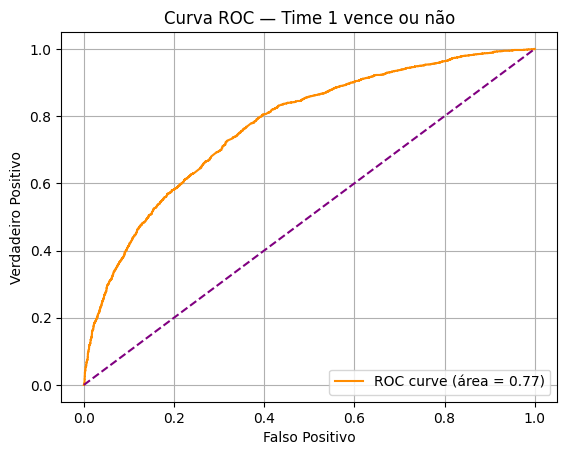

In [ ]:
# curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (área = {roc_auc:.2f})') #ver a curva dos falsos positivos com os verdadeiros positivos
plt.plot([0, 1], [0, 1], color='purple', linestyle='--') #se a curva ROC estiver ACIMA do chute (reta y = x), então o modelo funciona e tem poder de diferenciar e prever
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC — Time 1 vence ou não')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Vou plotar um gráfico de relevância que facilita o compreendimento de quais variaveis são mais relevantes. As que tiverem o maior modulo, são as que mais tem a relevancia para nosso modelo.

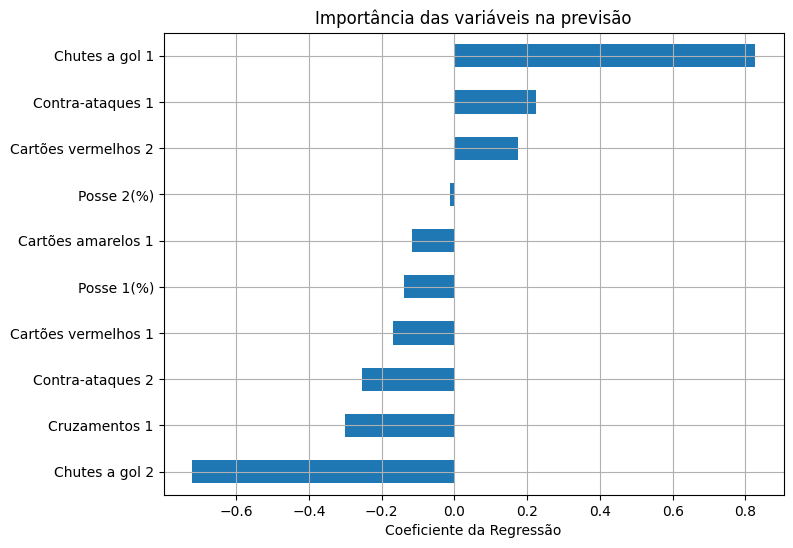

In [ ]:
# Visualizar importância das variáveis selecionadas
selected_features = X.columns[selector.get_support()]
coeficientes = pd.Series(modelo.coef_[0], index=selected_features).sort_values() #aqui vamos usar esses dados para plotar os coeficientes de cada feature, analisando assim o quanto cada uma impacta na previsão, quanto maior for o módulo dela, melhor

plt.figure(figsize=(8, 6))
coeficientes.plot(kind='barh')
plt.title('Importância das variáveis na previsão')
plt.xlabel('Coeficiente da Regressão')
plt.grid()
plt.show()

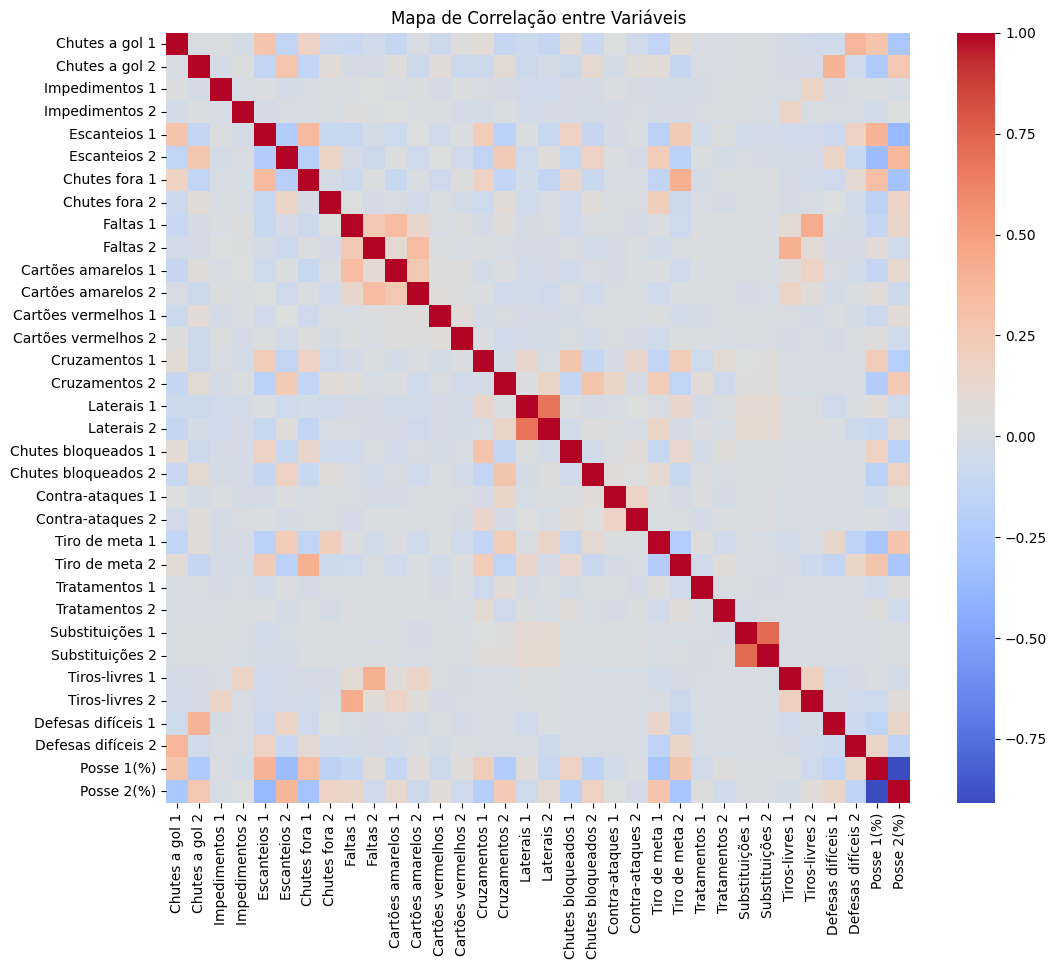

In [ ]:
# Aqui vamos ver a correlação entre as variaveis usando um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


Por fim, as métricas do modelo para avaliarmos sua eficiência.

Métricas do Modelo:
Acurácia:  0.70
Precisão:  0.70
Recall:    0.60
F1-score:  0.64


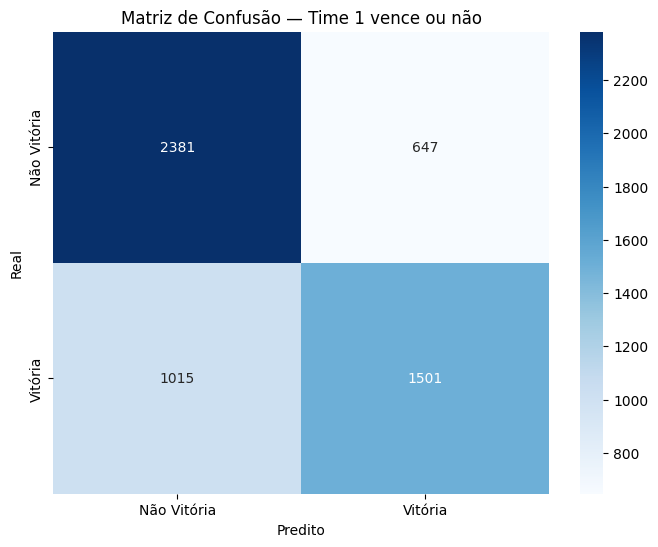

In [ ]:
# metricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# resultados
print("Métricas do Modelo:")
print(f"Acurácia:  {accuracy:.2f}")
print(f"Precisão:  {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")
#a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Vitória', 'Vitória'], yticklabels=['Não Vitória', 'Vitória'])
plt.title('Matriz de Confusão — Time 1 vence ou não')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()